### Lenker

 - <a href='http://sciencehackday.pbworks.com/w/page/24500475/Datasets#ParticlePhysics'>Oversikt</a>
 - <a href='https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh'>Nasa - Meteorer</a>
 - <a href='https://data.nasa.gov/'>Nasa</a>

In [3]:
import pandas as pd  
import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [4]:
df = pd.read_csv('Meteorite_Landings.csv')

In [5]:
df.size

457160

In [6]:
df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [7]:
df.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.983330, -115.683330)"


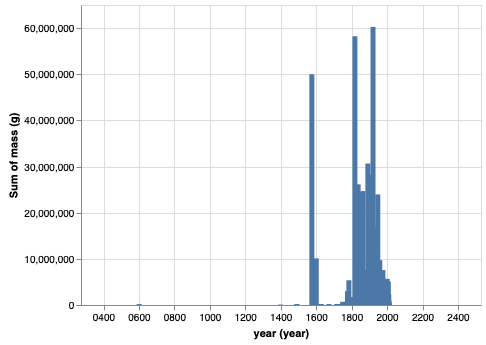

In [8]:
alt.Chart(df).mark_bar().encode(
    x = 'year(year):T',
    y = 'sum(mass (g)):Q'
)

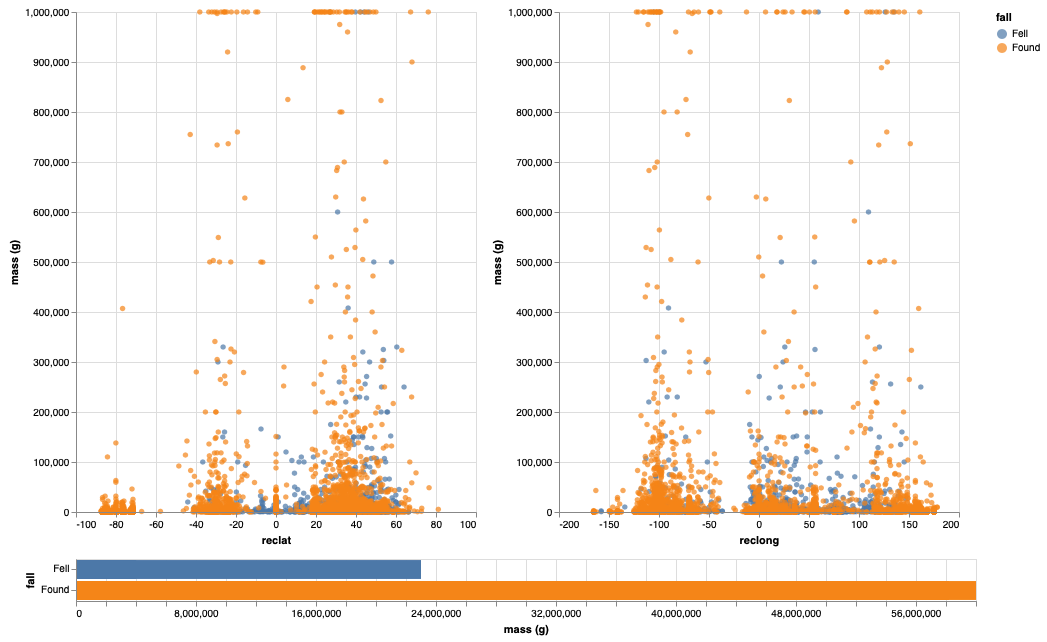

In [9]:
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

points1 = alt.Chart(df).mark_circle().encode(
    alt.X('reclat'),
    alt.Y('mass (g):Q', scale=alt.Scale(clamp=True, domain=[0, 1000000])),
    #size='mass (g)',
    tooltip=['name','year', 'mass (g)'],
    color = 'fall'
).properties(
    width=400,
    height=500
).add_selection(
    brush
).transform_filter(
    click
)
points2 = alt.Chart(df).mark_circle().encode(
    alt.X('reclong'),
    alt.Y('mass (g):Q', scale=alt.Scale(clamp=True, domain=[0, 1000000])),
    #size='mass (g)',
    tooltip=['name','year', 'mass (g)'],
    color = 'fall'
).properties(
    width=400,
    height=500
).add_selection(
    brush
).transform_filter(
    click
)

bars = alt.Chart(df).mark_bar().encode(
    x='mass (g)',
    y='fall:N',
    color=alt.condition(click, 'fall', alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=900,
).add_selection(
    click
)

(points1 | points2) & bars

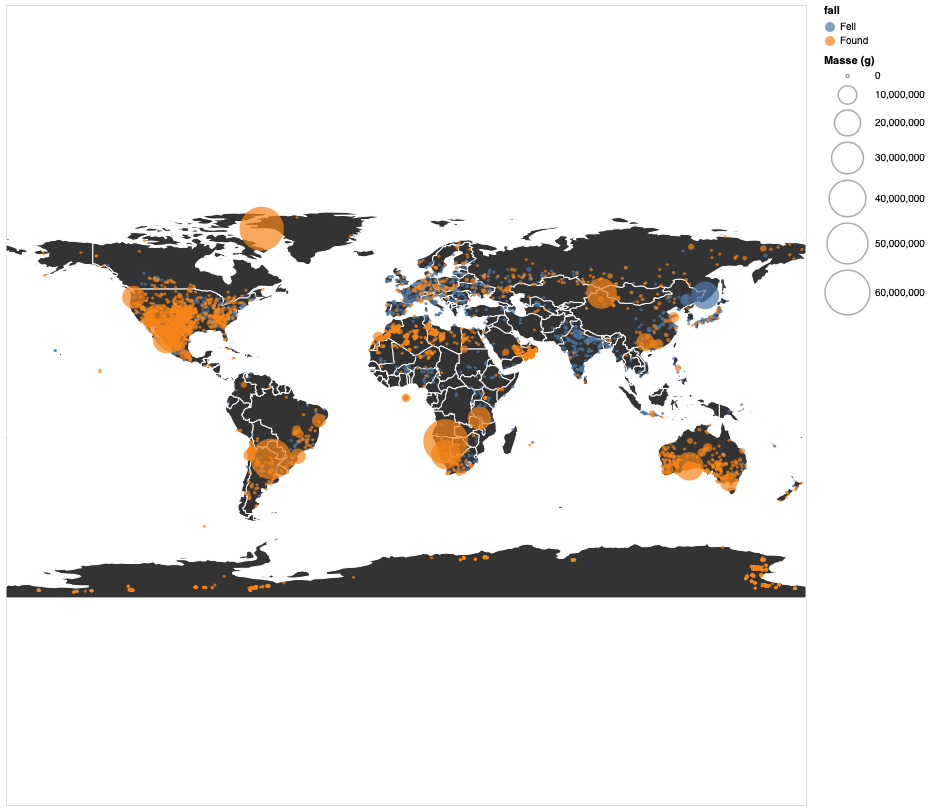

In [13]:
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(countries).mark_geoshape(
    fill='#333',
    stroke='white'
).properties(
    width=800,
    height=800
).project('equirectangular')

base

points = alt.Chart(df).mark_circle().encode(
     alt.Size('mass (g):Q',
        scale=alt.Scale(range=[10, 2000]),
        legend=alt.Legend(title='Masse (g)')
    ),
    longitude='reclong:Q',
    latitude='reclat:Q',
    tooltip=['name','year', 'mass (g)'],
    color = 'fall'
)

base + points

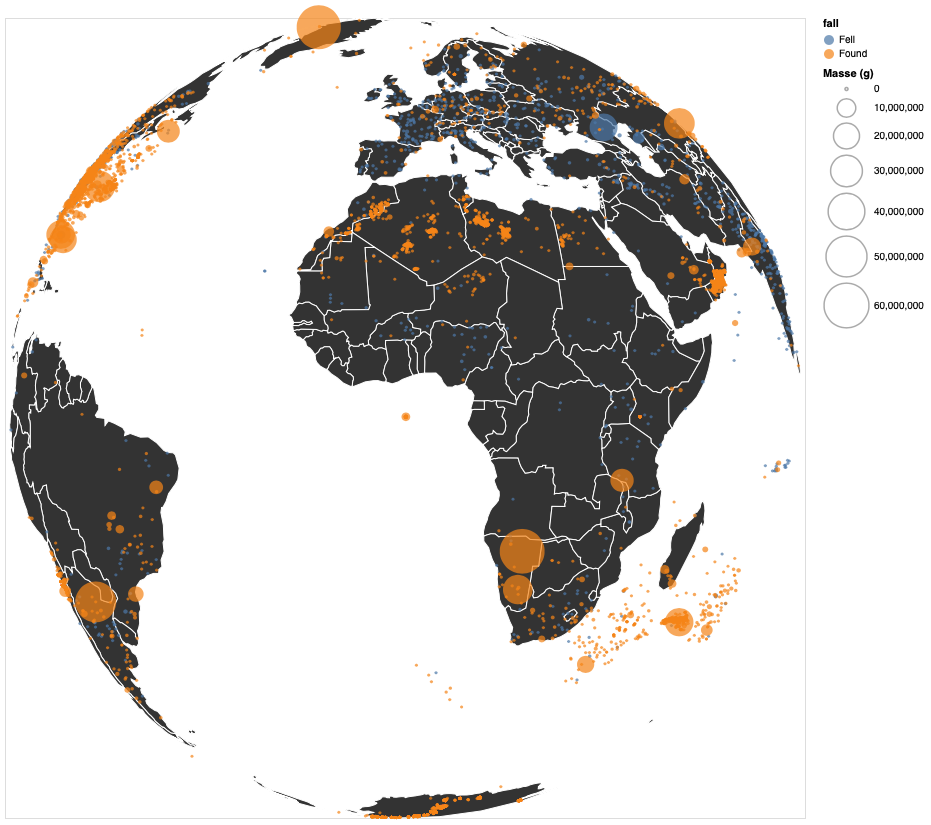

In [14]:
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(countries).mark_geoshape(
    fill='#333',
    stroke='white'
).properties(
    width=800,
    height=800
).project('orthographic')

base

points = alt.Chart(df).mark_circle().encode(
     alt.Size('mass (g):Q',
        scale=alt.Scale(range=[10, 2000]),
        legend=alt.Legend(title='Masse (g)')
    ),
    longitude='reclong:Q',
    latitude='reclat:Q',
    #size='mass (g)',
    tooltip=['name','year', 'mass (g)'],
    color = 'fall'
)

base + points

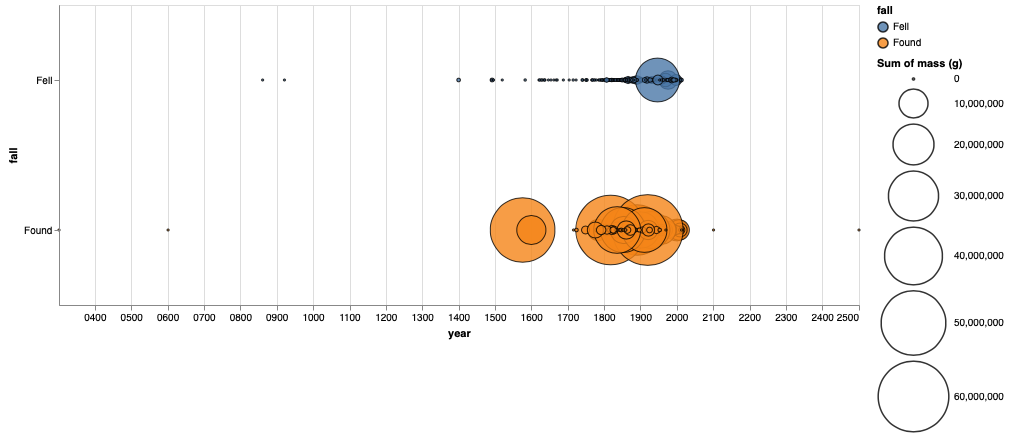

In [15]:
alt.Chart(df).mark_circle(
     opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.Size('sum(mass (g))',
        scale=alt.Scale(range=[5, 5000]),
    ),
    x = 'year:T',
    y = 'fall',
    color = 'fall'
).properties(
    width=800,
    height=300
)